In [61]:
import tensorflow as tf
import os


In [62]:
import cv2
import imghdr

In [63]:

data_dir = '/content/drive/MyDrive/dataset'

In [64]:

image_exts = ['jpeg','jpg', 'bmp', 'png']

In [65]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [66]:
import numpy as np
from matplotlib import pyplot as plt

In [67]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dataset')

Found 1605 files belonging to 2 classes.


In [68]:
data_iterator = data.as_numpy_iterator()

In [69]:
batch = data_iterator.next()

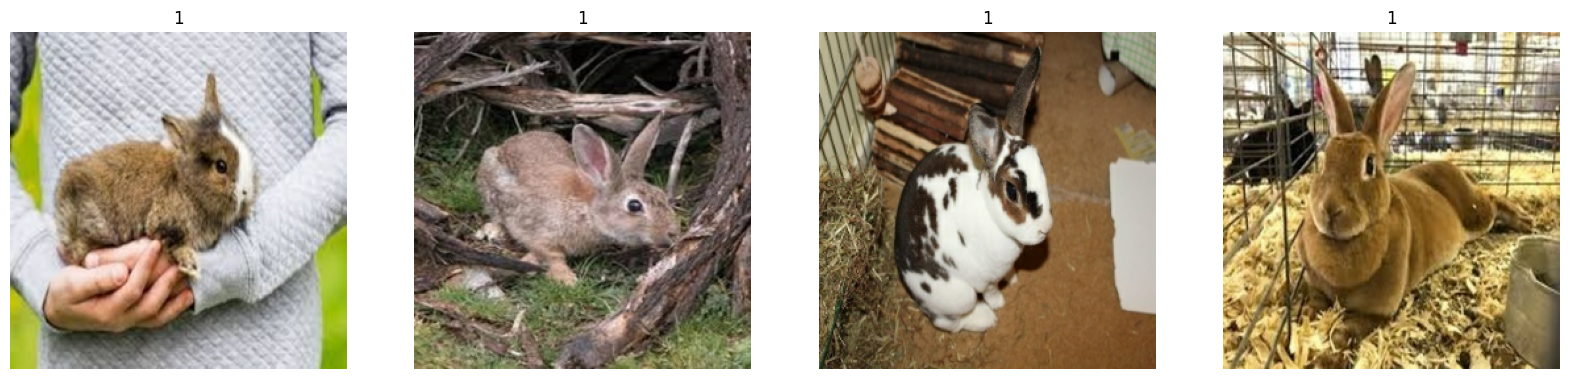

In [70]:

# Create a figure with 4 subplots arranged in a row
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Loop through the first 4 images and their corresponding labels
for idx in range(4):
    ax[idx].imshow(batch[0][idx].astype(int))         # Display the image
    ax[idx].set_title(batch[1][idx])                 # Set the title to the corresponding label
    ax[idx].axis('off')                              # Turn off the axis

plt.show()

In [71]:
data = data.map(lambda x,y: (x/255, y))

In [72]:
data.as_numpy_iterator().next()

(array([[[[7.8768380e-02, 8.6611517e-02, 4.3474264e-02],
          [7.8768380e-02, 8.6611517e-02, 4.3474264e-02],
          [7.8768380e-02, 8.6611517e-02, 4.3474264e-02],
          ...,
          [3.9215688e-02, 3.9215688e-02, 3.1372551e-02],
          [3.9215688e-02, 3.9215688e-02, 3.1372551e-02],
          [3.9215688e-02, 3.9215688e-02, 3.1372551e-02]],
 
         [[8.1341915e-02, 8.9185052e-02, 4.6047796e-02],
          [8.1341915e-02, 8.9185052e-02, 4.6047796e-02],
          [8.1341915e-02, 8.9185052e-02, 4.6047796e-02],
          ...,
          [3.9215688e-02, 3.9215688e-02, 3.1372551e-02],
          [3.9215688e-02, 3.9215688e-02, 3.1372551e-02],
          [3.9215688e-02, 3.9215688e-02, 3.1372551e-02]],
 
         [[8.0116421e-02, 8.7959558e-02, 4.4822305e-02],
          [8.0116421e-02, 8.7959558e-02, 4.4822305e-02],
          [8.0116421e-02, 8.7959558e-02, 4.4822305e-02],
          ...,
          [3.9215688e-02, 3.9215688e-02, 3.1372551e-02],
          [3.9215688e-02, 3.9215688e-

In [73]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [74]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [76]:
model = Sequential()

In [77]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [79]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [80]:
logdir='/content/drive/MyDrive/logs'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [82]:
hist = model.fit(train, epochs=7, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/7
35/35 [==============================] - 82s 2s/step - loss: 0.8091 - accuracy: 0.6161 - val_loss: 0.5625 - val_accuracy: 0.7125
Epoch 2/7
35/35 [==============================] - 79s 2s/step - loss: 0.4532 - accuracy: 0.7795 - val_loss: 0.5583 - val_accuracy: 0.7531
Epoch 3/7
35/35 [==============================] - 78s 2s/step - loss: 0.3523 - accuracy: 0.8339 - val_loss: 0.3403 - val_accuracy: 0.8594
Epoch 4/7
35/35 [==============================] - 77s 2s/step - loss: 0.2904 - accuracy: 0.8759 - val_loss: 0.3596 - val_accuracy: 0.8406
Epoch 5/7
35/35 [==============================] - 77s 2s/step - loss: 0.2420 - accuracy: 0.9080 - val_loss: 0.4438 - val_accuracy: 0.7844
Epoch 6/7
35/35 [==============================] - 80s 2s/step - loss: 0.1733 - accuracy: 0.9321 - val_loss: 0.3741 - val_accuracy: 0.8438
Epoch 7/7
35/35 [==============================] - 91s 3s/step - loss: 0.1356 - accuracy: 0.9536 - val_loss: 0.2732 - val_accuracy: 0.8687


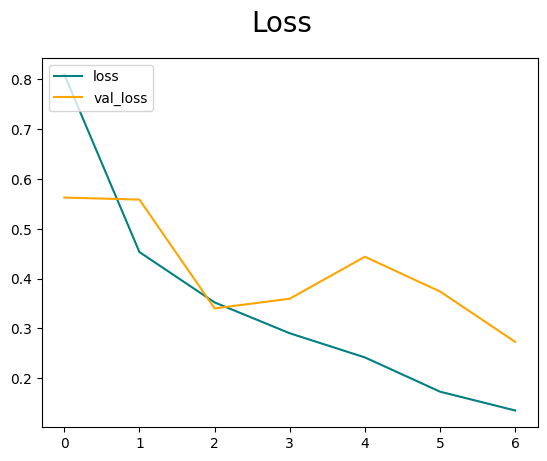

In [83]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

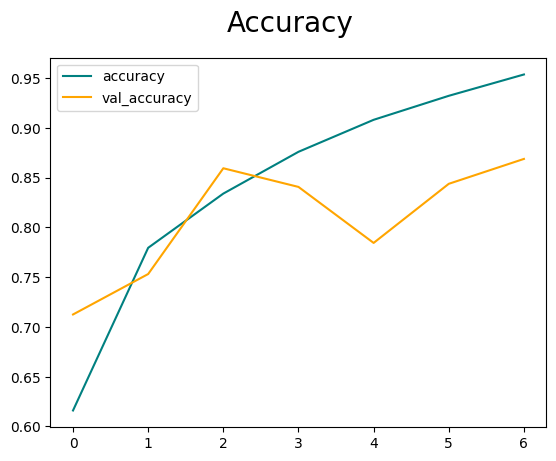

In [84]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [85]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [86]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [87]:

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 503ms/step


In [88]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.86315787, shape=(), dtype=float32) tf.Tensor(0.95348835, shape=(), dtype=float32) tf.Tensor(0.89375, shape=(), dtype=float32)


In [89]:
import cv2

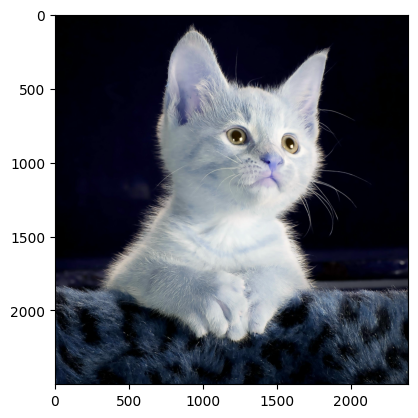

In [107]:
img = cv2.imread('/content/drive/MyDrive/pexels-pixabay-45201.jpg')
plt.imshow(img)
plt.show()

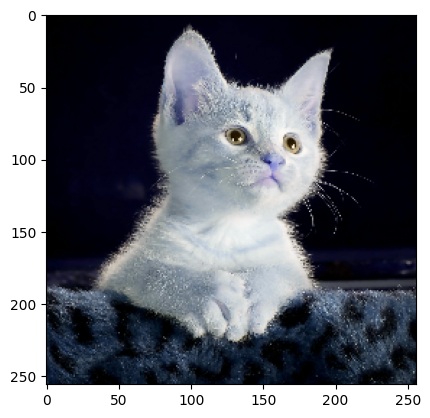

In [108]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [109]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 56ms/step


In [110]:
yhat

array([[0.27944544]], dtype=float32)

In [112]:
if yhat > 0.5:
    print(f'Predicted class is Rabit')
else:
    print(f'Predicted class is Cat')

Predicted class is poocha


In [113]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

new_model = load_model('imageclassifier.h5')